# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!curl -O https://raw.githubusercontent.com/udacity/workspaces-student-support/master/jupyter/workspace_utils.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1554  100  1554    0     0   6532      0 --:--:-- --:--:-- --:--:--  7435


In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [6]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: 0.09500000160187483


When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [8]:
from maddpg import Agent
from collections import deque
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [9]:
def ddpg(n_episodes=3000, print_every=5, train_mode=True,score_req=0.5):
    """
    DDPG : Deep Deterministic Policy Gradient
    
    Params:
        n_episodes (int)      : maximum number of training episodes
        train_mode (bool)     : If executing in Train mode
        print_every (int)     : display results interval

    """
    scores_avg = deque(maxlen=100)  # mean scores from most recent episodes
    all_scores=[]

    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name] # reset environment
        states = env_info.vector_observations                   # get current state for each agent      
        scores = np.zeros(num_agents)                           # initialize score for each agent
        agent1.reset()
        agent2.reset()
        while True:
            actions1 = agent1.act(np.expand_dims(states[0], axis=0), add_noise=True)         # select an action
            actions2 = agent2.act(np.expand_dims(states[1], axis=0), add_noise=True)         # select an action
            actions = np.concatenate((actions1, actions2), axis=0).flatten()
            env_info = env.step(actions)[brain_name]            # send actions to environment
            next_states = env_info.vector_observations # get next state
            rewards = env_info.rewards                          # get reward
            dones = env_info.local_done                         # see if episode has finished  
            agent1.step(np.expand_dims(states[0], axis=0), actions[:2], rewards[0], np.expand_dims(next_states[0], axis=0), dones[0]) # agent 1 learns
            agent2.step(np.expand_dims(states[1], axis=0), actions[2:], rewards[1], np.expand_dims(next_states[1], axis=0), dones[1]) # agent 2 learns
            states = next_states
            scores += np.max(rewards)        
            if np.any(dones):                                   
                break

        scores_avg.append(np.max(scores))    # save moving average
        all_scores.append(np.max(scores))
                
        if i_episode % print_every == 0:
            print('\rEpisode {} Avg Score: {:.5f}'.format(i_episode, np.mean(scores_avg)))
                  
        if np.mean(scores_avg)>=score_req and i_episode >= 100:
            print('\nSOLVED in {} episodes!\tWith an average score: {:.5f} over last 100 episodes'.format(\
                                    i_episode, np.mean(scores_avg)))            
            if train_mode:
#                 torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
#                 torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') 
                torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
                torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
                torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
                torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
            break
            
    return all_scores,scores_avg

In [10]:
# initialize agents
agent1 = Agent(state_size, action_size,1, random_seed=0)
agent2 = Agent(state_size, action_size,1, random_seed=0)

In [11]:
from workspace_utils import active_session

with active_session():
    scores, avgs = ddpg()

Episode 5 Avg Score: 0.04000
Episode 10 Avg Score: 0.02000
Episode 15 Avg Score: 0.01333
Episode 20 Avg Score: 0.01000
Episode 25 Avg Score: 0.00800
Episode 30 Avg Score: 0.01333
Episode 35 Avg Score: 0.02000
Episode 40 Avg Score: 0.02250
Episode 45 Avg Score: 0.03111
Episode 50 Avg Score: 0.03600
Episode 55 Avg Score: 0.03818
Episode 60 Avg Score: 0.04167
Episode 65 Avg Score: 0.04000
Episode 70 Avg Score: 0.04000
Episode 75 Avg Score: 0.04267
Episode 80 Avg Score: 0.04125
Episode 85 Avg Score: 0.04353
Episode 90 Avg Score: 0.04556
Episode 95 Avg Score: 0.04526
Episode 100 Avg Score: 0.04600
Episode 105 Avg Score: 0.04700
Episode 110 Avg Score: 0.05000
Episode 115 Avg Score: 0.05690
Episode 120 Avg Score: 0.06090
Episode 125 Avg Score: 0.06490
Episode 130 Avg Score: 0.06890
Episode 135 Avg Score: 0.07190
Episode 140 Avg Score: 0.07490
Episode 145 Avg Score: 0.07590
Episode 150 Avg Score: 0.07890
Episode 155 Avg Score: 0.08490
Episode 160 Avg Score: 0.09190
Episode 165 Avg Score: 0.096

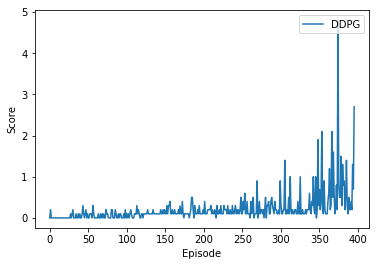

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.ylabel('Score')
plt.xlabel('Episode')
plt.legend(loc='upper right');
plt.show()

In [13]:
# !tar chvfz tennis.tar.gz *